# Data preprocessing

Natural Language Processing (NLP) is a rapidly growing field that has numerous applications in various domains, including healthcare. The medical field has an abundance of data that can be utilized for NLP tasks, such as medical transcriptions and clinical notes. However, this data often requires extensive preprocessing before it can be used effectively for machine learning models.

The dataset we'll be using comes from the [socd6/medical-nlp](https://github.com/socd06/medical-nlp0) repository.
This dataset, compiled for NLP experiments, contains medical transcriptions and custom-generated clinical stop words and vocabulary. It includes a fully processed dataset simplified to 4 classes: Surgery, Medical Records, Internal Medicine, and Other. The dataset is divided into training and test subsets to allow for the development and evaluation of machine learning models. The dataset also contains the original medical specialties for each transcription.

## Objective

The objective of this workshop is to finetune a BERT (Bidirectional Encoder Representations from Transformers) model to classify medical transcriptions. BERT is a powerful NLP model that has achieved state-of-the-art results on a wide range of NLP tasks. By using BERT, we aim to improve the accuracy and effectiveness of our classification model.

In this Jupyter Notebook, we will explore the preprocessing steps required to prepare the dataset for use in the BERT model. We will generate two datasets:

 1. Fine-tuning dataset to have the BERT model better suit handling medical transcriptions.
 2. Validation dataset to inspect the classification accuracy of the BERT models.



## Instructions

The notebook has been implemented to require the user to write their own code. Normal descriptive information is in plain text.

> Any text within a quote block indicates instructions for the user.

## Initial load

Let's first begin by taking a look at our data.



> Use the pandas library to read in the medical-nlp dataset from the file path ``"../../data/medical-nlp/mtsamples.csv"`` and assign it to a variable named ``df``.
>
> Print out a list of the columns in the dataset.
>
> Display the first few rows of the dataset.

In [1]:
import pandas as pd
import seaborn as sns

RAW_DATA_PATH = "../../data/medical-nlp/mtsamples.csv"

sns.set()

df = pd.read_csv(RAW_DATA_PATH, index_col=0)
print("Columns:")
for c in df.columns:
    print(f"  {c}")
df.head()


Columns:
  description
  medical_specialty
  sample_name
  transcription
  keywords


,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


Let's also review column-wise contents.


> Generate a summary of descriptive statistics for the numeric columns in the dataset
>
> Display the resulting summary statistics.

In [2]:
df.describe()


,description,medical_specialty,sample_name,transcription,keywords
count,4999,4999,4999,4966,3931
unique,2348,40,2377,2357,3849
top,An example/template for a routine normal male...,Surgery,Lumbar Discogram,"PREOPERATIVE DIAGNOSIS: , Low back pain.,POSTO...",
freq,12,1103,5,5,81


## Missing data handling

It seems that not every row have all the values. Let's investigate.

>Check the dataset for missing values.
>
>Display the number of missing values in each column of the dataset.

In [3]:
df.isnull().sum(axis=0)


description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

Medical appointment transcriptions are full length texts that we are really interested in. Let's drop any rows that are missing the values for `transcription`.

>Remove any rows from the ``df`` dataset where the ``transcription`` column contains missing values.
>
>Display a summary of descriptive statistics for the numeric columns in the resulting dataset.

In [4]:
df.dropna(axis="index", subset=["transcription"], inplace=True)
df.describe()


,description,medical_specialty,sample_name,transcription,keywords
count,4966,4966,4966,4966,3898
unique,2336,40,2360,2357,3816
top,An example/template for a routine normal male...,Surgery,Lumbar Discogram,"PREOPERATIVE DIAGNOSIS: , Low back pain.,POSTO...",
freq,12,1088,5,5,81


In [5]:
# Don't remove this cell
assert df.shape == (4966, 5)


## Exploration

In this section, we will explore the ``medical_specialty`` and ``transcription`` columns of the medical-nlp dataset in more detail. These columns contain valuable information about the medical specialties and corresponding transcriptions of the medical reports.

The ``medical_specialty`` column indicates the medical specialty associated with each report, such as cardiology, neurology, or orthopedics. This column may provide useful insights into the distribution of medical reports across different specialties and the potential differences in language use between them.

The ``transcription`` column contains the text of the medical reports themselves. This column is of particular interest as it contains the primary data we will be using to train and evaluate our machine learning models. The text data in this column will require extensive preprocessing to ensure that it is in a suitable format for use with our models.

In the following cells, we will explore the distribution of medical specialties in the dataset and examine some example transcriptions to gain a better understanding of the text data we are working with. We will also discuss the preprocessing steps required to prepare the text data for use with machine learning models.

### `medical_specialty`

Let's begin with the `medical_specialty` column. First we find out the unique values in the column.

>Retrieve the unique values from the ``medical_specialty`` column of the ``df`` dataset.
>
>Print out the number of unique medical specialties in the dataset.
>
>Display a list of the unique medical specialties.

In [6]:
medical_specialties = df["medical_specialty"].unique()
print(f"Unique medical specialties: {len(medical_specialties)}")
medical_specialties


Unique medical specialties: 40


array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

Let's then visualize the distribution of medical specialties in our dataset.

>Count the number of occurrences of each medical specialty in the ``medical_specialty`` column of the ``df`` dataset.
>
>Generate a horizontal bar chart to visualize the distribution of medical specialties.
>
>Set the size of the chart to fit the image within the Jupyter Notebook cell and adjust the font size as needed.

<Axes: >

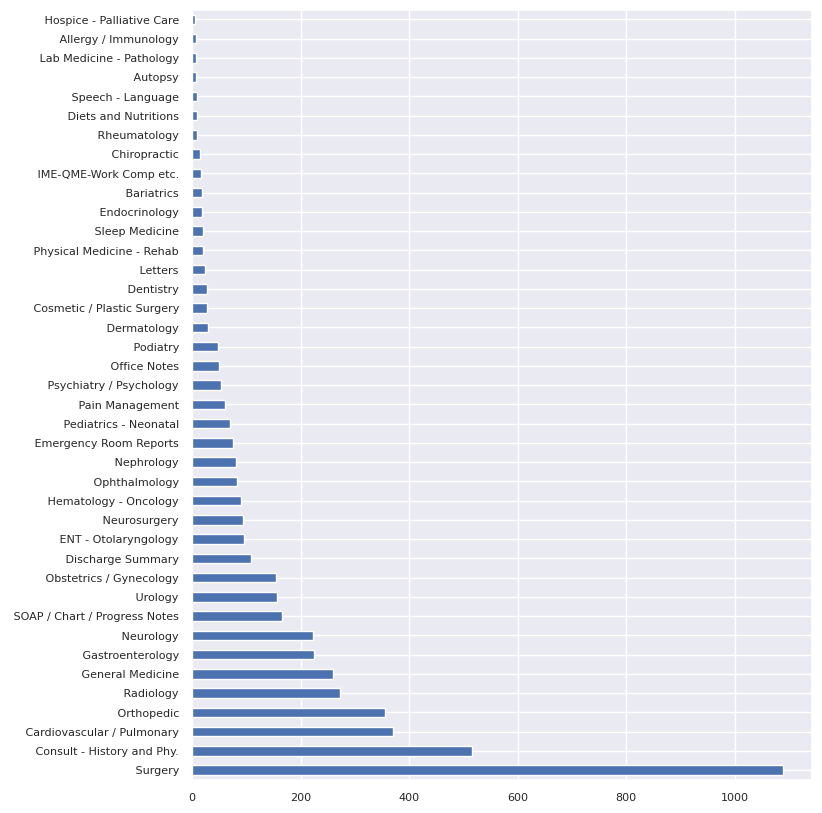

In [7]:
df["medical_specialty"].value_counts().plot(kind="barh", figsize=(8, 10), fontsize=8)


From this we can see that the dataset is skewed rather than uniformly distributed. 

### `transcription`

Let's then find some descriptive details about the transcriptions too. Let's begin by getting the distribution of transcription character lengths.

>Retrieve the length of each ``transcription`` in the transcription column of the ``df`` dataset.
>
>Plot an empirical cumulative distribution function (ECDF) of the transcription lengths using Seaborn's ``ecdfplot()`` function.

<Axes: xlabel='transcription', ylabel='Proportion'>

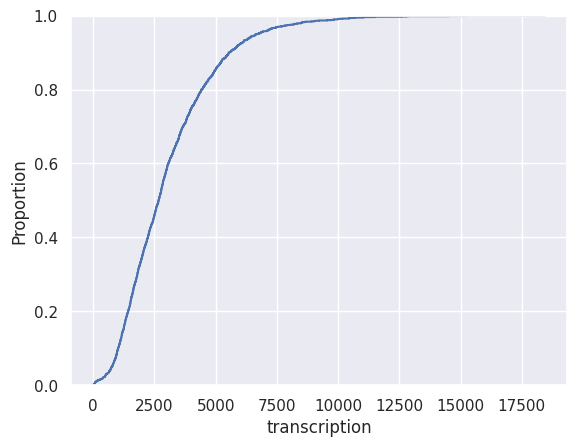

In [8]:
sns.ecdfplot(df["transcription"].apply(len))

The median length of the transcriptions is around 3000 chracters. This doesn't, however, tell a lot as with NLP single characters are not that telling enough.

## Preprocessing the texts

Here's an outline of the steps you can take to prepare your data for an NLP task. These preprocessing steps are not always necessary or appropriate for every NLP task or dataset. However, they are commonly applied to text data to help improve the accuracy and efficiency of NLP models:

- __Lowercasing the text__: Text data is often case sensitive, meaning that "hello" and "Hello" would be treated as different words by NLP models. Lowercasing the text can help to standardize the text and reduce the dimensionality of the feature space.

- __Removing punctuation__: Punctuation marks such as commas, periods, and question marks do not contribute much to the meaning of text and can add noise to NLP models. Removing punctuation can help to simplify the text and make it easier for models to learn from.

- __Tokenization__: Breaking text data into individual words or subwords (tokens) is a fundamental step in many NLP tasks. Tokenization helps to simplify the text and make it easier to analyze, process, and understand.

- __Removing stop words__: Stop words are common words such as "the", "and", and "a" that do not carry much meaning in text data. Removing stop words can help to simplify the text and reduce the dimensionality of the feature space.

- __Stemming or lemmatization__: Words in text data can have different forms (e.g., "run", "running", "ran"). Stemming or lemmatization is the process of reducing words to their base form, such as "run". This can help to standardize the text and reduce the dimensionality of the feature space.


### Tokenization 

What we're interested in are the __tokens__ of the transcription. In NLP, a token is a sequence of characters that represents a unit of meaning. It is typically a word, but can also be a phrase or a subword. The process of breaking text into tokens is called tokenization, and it is a fundamental step in many NLP tasks, including text classification, machine translation, and sentiment analysis.

Tokenization is necessary because most NLP algorithms and models operate on discrete units of text, rather than on continuous text. By breaking text into tokens, we can analyze, process, and understand the meaning of text more efficiently and effectively.

A token can be defined in many ways, depending on the specific NLP task and the level of granularity required. For example, a token can be a sequence of characters separated by white spaces, a sequence of characters separated by punctuation marks, or a subword obtained through a more complex process such as byte-pair encoding or wordpiece.

Consider the following sentence:

        "a fox was happily jumping in the field with a hedgehog"

To tokenize the text, it can be  split into individual words, resulting in the following list of tokens:

        ["a", "fox", "was", "happily", "jumping", "in", "the", "field", "with", "a", "hedgehog"]


### Removing stop words

Stop word removal is a preprocessing step in NLP that involves removing common words that do not carry much meaning in text data. These common words are known as stop words and typically include words such as "the", "and", "a", and "in".

The goal of stop word removal is to simplify the text and reduce the dimensionality of the feature space, which can improve the efficiency and accuracy of NLP models. Removing stop words can also help to reduce noise in the text and improve the interpretability of the results.

However, stop word removal should be used with care, as removing too many words can lead to loss of information and potential reduction in model performance. Additionally, the list of stop words used may vary depending on the language of the text, the specific NLP task at hand, and the requirements of the downstream NLP model.

For our tokenized sentence, the stop words could very well be `"a"`, `"was"` and `"the"`. After the removal, the tokenized sentence would turn out to be:

        ["fox", "happily", "jumping", "in", "field", "with", "hedgehog"]



### Stemming

Stemming is a process in NLP that involves reducing words to their base form, or stem. The goal of stemming is to standardize the text and reduce the dimensionality of the feature space, which can help improve the accuracy and efficiency of NLP models.

There are several algorithms that can be used for stemming, including the Porter stemming algorithm, the Snowball stemming algorithm, and the Lancaster stemming algorithm. These algorithms apply a set of rules to reduce words to their base form, such as removing suffixes or prefixes, and may use language-specific rules or heuristics to handle irregular words.

For example, the Porter stemming algorithm first breaks the sentence into individual words, based on the spaces between the words. In this case, the resulting words would be:

        "fox" would become "fox"
        "happily" would become "happili"
        "jumping" would become "jump"
        "in" would become "in"
        "field" would become "field"
        "with" would become "with"
        "hedgehog" would become "hedgehog"

This would turn the tokens in the initial sentence into:

        ["fox", "happili", "jump", "in", "field", "with", "hedgehog"]

### Data selection

Let's first begin by selecting only the data that we're interested in. Let's select only those medical specialties that have more than 5 % coverage in the whole dataset to have at least somewhat balanced dataset.

>Filter the dataframe to include only the rows corresponding to medical specialties that are represented by more than 5 % of the data, and store the resulting filtered dataframe in a new variable `df_processed`.
>
>Compute and print the frequency of each medical specialty in the filtered dataframe as a proportion of the total number of rows.
>
>Create a horizontal bar chart to visualize the frequency distribution of medical specialties in the filtered dataframe.

 Surgery                       0.380154
 Consult - History and Phy.    0.180294
 Cardiovascular / Pulmonary    0.129630
 Orthopedic                    0.124039
 Radiology                     0.095388
 General Medicine              0.090496
Name: medical_specialty, dtype: float64


<Axes: >

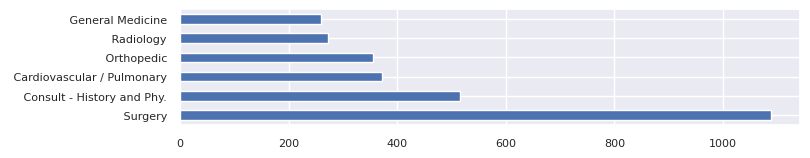

In [9]:
specialty_filter = df["medical_specialty"].value_counts(normalize=True) > 0.05
df_processed = df[
    df["medical_specialty"].isin(specialty_filter[specialty_filter].index)
]
print(df_processed["medical_specialty"].value_counts(normalize=True))
df_processed["medical_specialty"].value_counts().plot(
    kind="barh", figsize=(8, 1.5), fontsize=8
)


Let's then select the columns that are of interest for us.

> Select the ``medical_specialty`` and ``transcription`` columns from the processed dataframe

In [10]:
df_processed = df_processed[["medical_specialty", "transcription"]]


In [11]:
# Don't remove this cell
assert df_processed.shape == (2862, 2)

### Preprocessing

Let's perform the preprocessing in one go. The ``preprocess_text`` function is a text preprocessing function in NLP that takes as input a string of text and applies several preprocessing steps in sequence to clean and transform the text for use in downstream NLP tasks.

The preprocessing steps applied in this function include:
1. Lowercasing the text to standardize the text and reduce the dimensionality of the feature space.
1. Removing punctuation from the text to remove noise and simplify the text.
1. Tokenizing the text to break it into individual words, which can be used as features in downstream NLP models.
1. Removing stop words from the text, which are common words that do not carry much meaning in text data, to reduce noise and improve the efficiency and accuracy of downstream NLP models.
1. Lemmatizing the words in the text, which involves reducing words to their base form to further reduce the dimensionality of the feature space and improve the accuracy of downstream NLP models.

In [12]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Return the preprocessed text as a string
    return words


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/grimfada/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/grimfada/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/grimfada/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/grimfada/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Let's then preprocess our data with the function.

>Apply a text preprocessing function to a column of text data in a Pandas dataframe, such as the "transcription" column, and store the preprocessed text in a new column of the same dataframe.
>
>Inspect the first few rows of a Pandas dataframe containing preprocessed text data, to verify that the preprocessing function was applied correctly and that the resulting text data is in the desired format.

In [13]:
df_processed["transcription"] = df_processed["transcription"].apply(preprocess_text)
df_processed.head()


,medical_specialty,transcription
3,Cardiovascular / Pulmonary,"[2d, mmode, 1, left, atrial, enlargement, left..."
4,Cardiovascular / Pulmonary,"[1, left, ventricular, cavity, size, wall, thi..."
7,Cardiovascular / Pulmonary,"[2d, echocardiogrammultiple, view, heart, grea..."
9,Cardiovascular / Pulmonary,"[description1, normal, cardiac, chamber, size2..."
11,Cardiovascular / Pulmonary,"[2d, study1, mild, aortic, stenosis, widely, c..."


In [14]:
assert isinstance(df_processed.iloc[0,1], list)

While we're operating with tokens already, let's retrieve the character level lengths for comparison.

>Retrieve the length of each ``transcription`` in the transcription column of the ``df_processed`` dataset.
>
>Plot an empirical cumulative distribution function (ECDF) of the transcription lengths using Seaborn's ``ecdfplot()`` function.

<Axes: xlabel='transcription', ylabel='Proportion'>

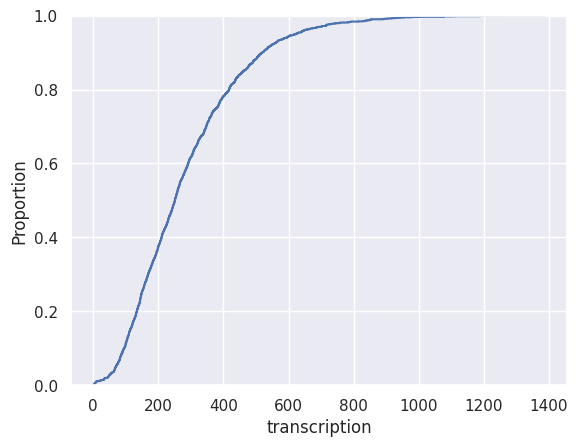

In [15]:
sns.ecdfplot(df_processed["transcription"].apply(len))


Median length is now around 2000 characters and the longer transcriptions are also considerably shorter now.

### Splitting the data

The last part is to split the processed data into fine-tuning and validation datasets. 

> Split the processed data into 80 % training (``df_train``) and 20 % validation (`df_validation`).

In [27]:
train_split = 0.8
df_train = df_processed.sample(frac=train_split)
df_validation = df_processed.drop(df_train.index)

In [28]:
# Don't remove this cell
assert 2280 < df_train.shape[0] < 2300
assert 560 < df_validation.shape[0] < 580

### Saving the data

The last step in preprocessing is saving the processed training and validation datasets for later use.

> Persist the training and validation sets as CSVs to the repository's data-folder:
> - Training CSV path: `"../../data/train.csv"`
> - Validation CSV path: `"../../data/validation.csv"`

In [30]:
df_train.to_csv("../../data/train.csv")
df_validation.to_csv("../../data/validation.csv")


In [32]:
# Don't remove this cell
import os

assert os.path.isfile("../../data/train.csv")
assert os.path.isfile("../../data/validation.csv")
